<a href="https://colab.research.google.com/github/namita0210/DataSciencePRojects/blob/main/India's_Export_Analysis_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# Import all required libraries
import warnings
from prettytable import PrettyTable
from plotly.subplots import make_subplots
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
import matplotlib

from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import normalize
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
import altair as alt
import math
import sys
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import RobustScaler
from google.colab import files

from matplotlib.colors import ListedColormap

from sklearn.decomposition import PCA

from mlxtend.frequent_patterns import apriori, association_rules

alt.renderers.enable('default')

warnings.filterwarnings('ignore')
pd.set_option('precision', 2)

In [ ]:
#download csv from https://drive.google.com/file/d/1Ro6a1_Zd9YrKEdbZlYW4IGLXUUES8cuU/view?usp=sharing
df = pd.read_csv('/content/2021-2010_export.csv',encoding='unicode_escape')
#checking missing values
null_values=df.isnull().sum()
print(null_values)

HSCode          0
Commodity       0
value        9875
country         1
year            1
dtype: int64


In [ ]:
#droping missing values
df.dropna(inplace=True)
print(df.isnull().sum())
df.info()
df['Commodity']=df['Commodity'].str.strip()
unique_export_commodities = df.Commodity.unique().tolist()
print(len(unique_export_commodities))

HSCode       0
Commodity    0
value        0
country      0
year         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 87049 entries, 0 to 96921
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HSCode     87049 non-null  int64  
 1   Commodity  87049 non-null  object 
 2   value      87049 non-null  float64
 3   country    87049 non-null  object 
 4   year       87049 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ MB
98


In [ ]:
#data of top 10 export partner's of india is stored in export_data
export_data=df.loc[(df['country'].isin(['U S A', 'U ARAB EMTS','CHINA P RP','BANGLADESH PR','NETHERLAND','HONG KONG','SINGAPORE','BELGIUM','GERMANY','U K']))]

export_data.head(30)
export_data.info()
#type casting
export_data['value'] = pd.to_numeric(export_data['value'], errors='coerce')
print(type(export_data['value']))
export_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6008 entries, 1037 to 95296
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HSCode     6008 non-null   int64  
 1   Commodity  6008 non-null   object 
 2   value      6008 non-null   float64
 3   country    6008 non-null   object 
 4   year       6008 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 281.6+ KB
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6008 entries, 1037 to 95296
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HSCode     6008 non-null   int64  
 1   Commodity  6008 non-null   object 
 2   value      6008 non-null   float64
 3   country    6008 non-null   object 
 4   year       6008 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 281.6+ KB


In [ ]:
export_data.head(9000)
#NaN values dropped
export_data.dropna(inplace=True)
export_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6008 entries, 1037 to 95296
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HSCode     6008 non-null   int64  
 1   Commodity  6008 non-null   object 
 2   value      6008 non-null   float64
 3   country    6008 non-null   object 
 4   year       6008 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 281.6+ KB


In [ ]:

#styling dataframe describe table
styles = [
    dict(selector="tr:hover", props=[("background", "#f4f4f4")]),
    dict(selector="th",
         props=[("color", "#000000"), ("border", "1px solid #eee"),
                ("padding", "12px 35px"), ("border-collapse", "collapse"),
                ("background", "#FFD700"), ("font-size", "18px")]),
    dict(selector="caption",
         props=[
             ("caption-side", "top"),
             ("font-size", "25px"),
             ("border", "1px solid #eee"),
             ("padding", "12px 35px"),
         ]),
]
export_data.head(20).style.set_table_styles(styles).highlight_null(
    null_color='#FF8C00').set_caption(
        "Highlighting null Values of Export Data")
export_data.describe().style.set_table_styles(styles).highlight_min(
    color='#E9967A').set_caption(
        "Short Summary of Numerical Varaibles of Export Data")



,HSCode,value,year
count,6008.00,6008.00,6008.00
mean,50.06,151.44,2015.33
std,28.46,734.76,1.83
min,1.00,0.00,2012.00
25%,25.00,1.34,2014.00
50%,50.00,11.73,2015.00
75%,74.00,65.97,2017.00
max,99.00,13884.06,2018.00


In [ ]:
print("No of Rows in Export Data where value is zero =", len(export_data[export_data['value'] == 0]))

No of Rows in Export Data where value is zero = 148


In [ ]:
# Fix some long Commodity names
dic = {
    'PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECIFIED OR INCLUDED.':
    'ANIMAL PRODUCTS',
    'NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.':
    'NUCLEAR EQUIPMENT',
    'OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;':
    'OPTICAL INSTRUMENTS',
    'FURNITURE; BEDDING, MATTRESSES, MATTRESS SUPPORTS, CUSHIONS AND SIMILAR STUFFED FURNISHING; LAMPS AND LIGHTING FITTINGS NOT ELSEWHERE SPECIFIED OR INC':
    'FURNITURE',
    'ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.':
    'ELECTRICAL MACHINERY',
    'RAILWAY OR TRAMWAY LOCOMOTIVES, ROLLING-STOCK AND PARTS THEREOF; RAILWAY OR TRAMWAY TRACK FIXTURES AND FITTINGS AND PARTS THEREOF; MECHANICAL':
    'RAILWAY MACHINERY',
    'TANNING OR DYEING EXTRACTS; TANNINS AND THEIR DERI. DYES, PIGMENTS AND OTHER COLOURING MATTER; PAINTS AND VER; PUTTY AND OTHER MASTICS; INKS.':
    'TANNING  EXTRACTS',
    'PREPARATIONS OF MEAT, OF FISH OR OF CRUSTACEANS, MOLLUSCS OR OTHER AQUATIC INVERTEBRATES':
    'PREPARATIONS OF NONVEG FOOD',
    'EXPLOSIVES; PYROTECHNIC PRODUCTS; MATCHES; PYROPHORIC ALLOYS; CERTAIN COMBUSTIBLE PREPARATIONS.':
    'EXPLOSIVES',
    'VEGETABLE PLAITING MATERIALS; VEGETABLE PRODUCTS NOT ELSEWHERE SPECIFIED OR INCLUDED.':
    'VEGETABLE PLAITING MATERIALS',
    'ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED.':
    'CLOTHING',
    'OTHER MADE UP TEXTILE ARTICLES; SETS; WORN CLOTHING AND WORN TEXTILE ARTICLES; RAGS':
    'TEXTILES',
    'VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF.':
    'SPARE PARTS'
}
export_data['Commodity'] = export_data['Commodity'].replace(dic)
export_data.head(9000)

,HSCode,Commodity,value,country,year
1037,1,LIVE ANIMALS.,0.91,BANGLADESH PR,2018.0
1038,2,MEAT AND EDIBLE MEAT OFFAL.,9.06,BANGLADESH PR,2018.0
1039,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",17.75,BANGLADESH PR,2018.0
1040,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,39.07,BANGLADESH PR,2018.0
1041,5,ANIMAL PRODUCTS,0.79,BANGLADESH PR,2018.0
...,...,...,...,...,...
95292,95,"TOYS, GAMES AND SPORTS REQUISITES; PARTS AND A...",1.25,CHINA P RP,2012.0
95293,96,MISCELLANEOUS MANUFACTURED ARTICLES.,3.67,CHINA P RP,2012.0
95294,97,WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.,2.40,CHINA P RP,2012.0
95295,98,PROJECT GOODS; SOME SPECIAL USES.,10.05,CHINA P RP,2012.0


In [ ]:
#Fixing country names
export_data.country = export_data.country.replace({
    'U K': 'UK',
    'U S A': 'USA',
    'BANGLADESH PR': 'BANGLADESH',
    'CHINA P RP': 'CHINA'
})
unique_export_country = export_data.country.unique().tolist()
print(unique_export_country)
export_data.loc[export_data['country'] == 'USA', 'Ccode'] = 1
export_data.loc[export_data['country'] == 'UK', 'Ccode'] = 2
export_data.loc[export_data['country'] == 'U ARAB EMTS', 'Ccode'] = 3
export_data.loc[export_data['country'] == 'SINGAPORE', 'Ccode'] = 4
export_data.loc[export_data['country'] == 'NETHERLAND', 'Ccode'] = 5
export_data.loc[export_data['country'] == 'HONG KONG', 'Ccode'] = 6
export_data.loc[export_data['country'] == 'GERMANY', 'Ccode'] = 7
export_data.loc[export_data['country'] == 'CHINA', 'Ccode'] = 8
export_data.loc[export_data['country'] == 'BELGIUM', 'Ccode'] = 9
export_data.loc[export_data['country'] == 'BANGLADESH', 'Ccode'] = 10
#export_data.drop(['Status'], axis=1,inplace=True)
export_data.describe()
export_data.info()
export_data.head(9000)

['BANGLADESH', 'BELGIUM', 'CHINA', 'GERMANY', 'HONG KONG', 'NETHERLAND', 'SINGAPORE', 'U ARAB EMTS', 'UK', 'USA']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6008 entries, 1037 to 95296
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HSCode     6008 non-null   int64  
 1   Commodity  6008 non-null   object 
 2   value      6008 non-null   float64
 3   country    6008 non-null   object 
 4   year       6008 non-null   float64
 5   Ccode      6008 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 328.6+ KB


,HSCode,Commodity,value,country,year,Ccode
1037,1,LIVE ANIMALS.,0.91,BANGLADESH,2018.0,10.0
1038,2,MEAT AND EDIBLE MEAT OFFAL.,9.06,BANGLADESH,2018.0,10.0
1039,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",17.75,BANGLADESH,2018.0,10.0
1040,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,39.07,BANGLADESH,2018.0,10.0
1041,5,ANIMAL PRODUCTS,0.79,BANGLADESH,2018.0,10.0
...,...,...,...,...,...,...
95292,95,"TOYS, GAMES AND SPORTS REQUISITES; PARTS AND A...",1.25,CHINA,2012.0,8.0
95293,96,MISCELLANEOUS MANUFACTURED ARTICLES.,3.67,CHINA,2012.0,8.0
95294,97,WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.,2.40,CHINA,2012.0,8.0
95295,98,PROJECT GOODS; SOME SPECIAL USES.,10.05,CHINA,2012.0,8.0


In [ ]:
#EDA
#Descriptive Analysis
#sorting by latest year
export_data = export_data.sort_values(by = ['year','country'], ascending=False)
export_data.head(70)

,HSCode,Commodity,value,country,year,Ccode
14871,1,LIVE ANIMALS.,0.18,USA,2018.0,1.0
14872,2,MEAT AND EDIBLE MEAT OFFAL.,0.78,USA,2018.0,1.0
14873,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",2000.30,USA,2018.0,1.0
14874,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,96.08,USA,2018.0,1.0
14875,5,ANIMAL PRODUCTS,2.75,USA,2018.0,1.0
...,...,...,...,...,...,...
14936,66,"UMBRELLAS, SUN UMBRELLAS, WALKING-STICKS, SEAT...",0.17,USA,2018.0,1.0
14937,67,PREPARED FEATHERS AND DOWN AND ARTICLES MADE O...,14.47,USA,2018.0,1.0
14938,68,"ARTICLES OF STONE, PLASTER, CEMENT, ASBESTOS, ...",538.83,USA,2018.0,1.0
14939,69,CERAMIC PRODUCTS.,84.39,USA,2018.0,1.0


In [ ]:
#number of unique commodities
unique_export_commodities = export_data.Commodity.unique().tolist()
print(len(unique_export_commodities))


98


In [ ]:
#top 10 commodities
top10_commidity = export_data.groupby('Commodity')['Commodity','value'].aggregate('sum')
# print(result)
top10_commidity=top10_commidity.sort_values(by='value',ascending=False)
top10_commidity.head(10)

,value
Commodity,
"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.",429586.46
"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",239024.05
NUCLEAR EQUIPMENT,86689.28
ORGANIC CHEMICALS,72315.87
PHARMACEUTICAL PRODUCTS,70198.99
ELECTRICAL MACHINERY,69506.14
CLOTHING,58162.30
"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, KNITTED OR CORCHETED.",54402.19
COTTON.,51834.46


In [ ]:
#years having highest export
year_export = export_data.groupby('year')['year','value'].aggregate('sum')
year_export=year_export.sort_values(by='value',ascending=False)
print(year_export.value)

year
2021    206733.55
2018    166821.36
2019    157847.84
2011    155164.81
2017    153710.01
2012    148978.68
2013    147561.48
2020    146007.65
2014    145970.58
2016    140427.30
2015    131182.65
2010    124167.60
Name: value, dtype: float64


In [ ]:
#which year had highest export
year = export_data.year.value_counts().head(1).index[0]
print("The Year Which has most Export Transactions wrt commodity=", year)

The Year Which has most Export Transactions wrt commodity= 2020


In [ ]:
#EDA
#Visualisation
#bar plot: yearwise value of export
df1 = export_data.groupby('year', as_index=False).agg({
    "value": "sum"
}).rename(columns={'value': 'Export'})
df1['Growth in Export'] = df1.set_index('year')['Export'].pct_change().values

fig = go.Figure(data=([
    go.Bar(x=df1.year,
           y=df1.Export,
           marker={"color": "#FF3900"},
           name="Export",
           textangle=0,
           textfont={'size': 12},
           texttemplate='%{y:.2s}',
           textposition='outside')
]))
fig.update_layout(
    title="Bar Plot of  Export from 2010 to 2021",
    xaxis_title="Year",
    yaxis_title="Value in USD",
    template='seaborn')
fig.show()

In [ ]:
#bar plot: countrywise value of export
df2 = export_data.groupby('country', as_index=False).agg({
    "value": "sum"
}).rename(columns={'value': 'Export'})
df2['Growth in Export'] = df2.set_index('country')['Export'].pct_change().values

fig = go.Figure(data=([
    go.Bar(x=df2.country,
           y=df2.Export,
           marker={"color": "pink"},
           name="Export",
           textangle=0,
           textfont={'size': 12},
           texttemplate='%{y:.2s}',
           textposition='outside')
]))
fig.update_layout(
    title="countrywise export value",
    xaxis_title="country",
    yaxis_title="Value",
    template='seaborn')
fig.show()

In [ ]:
# Interactive plot of Export to countries through years.
unique_countries = sorted(list(export_data.country.unique()))
default = unique_countries[0]

fig = go.Figure()
buttons, countries = [], []

for country in unique_countries:
    df = export_data[export_data.country == country]
    new_df = df.groupby('year', as_index=False).agg({'value': np.sum})

    fig.add_trace(
        go.Scatter(x=new_df['year'],
                   y=new_df['value'],
                   visible=(country == default),
                   mode='markers+lines',
                   name=country,
                   marker_color='#00FFFF'))

    countries.extend([country])

for country in unique_countries:
    buttons.append(
        dict(method='update',
             label=country,
             args=[{
                 'visible': [country == r for r in countries]
             }]))

fig.update_layout(
    showlegend=False,
    title_text='Line Chart of Export Value to Countries throughout Years.',
    title_font_color='#FF8C00',
    title_font_size=25,
    updatemenus=[{
        "buttons": buttons,
        "font": {
            'color': '#000080'
        },
        "direction": "down",
        "active": unique_countries.index(default),
        "showactive": True,
        "x": 1,
        "y": 1.08,
        'xanchor': 'right',
        'bgcolor': '#DEB887'
    }],
    template='plotly_dark')
fig['layout']['xaxis'].update(title_text='Years',
                              title_font_color='#00FA9A',
                              title_font_size=20)
fig['layout']['yaxis'].update(title_text='USD (in Millions)',
                              title_font_color='#00FA9A',
                              title_font_size=20)
fig.show()

[(0.18, 2018.0), (0.78, 2018.0), (2000.3, 2018.0), (96.08, 2018.0), (2.75, 2018.0), (21.03, 2018.0), (60.58, 2018.0), (76.13, 2018.0), (314.4, 2018.0), (207.17, 2018.0), (60.17, 2018.0), (235.93, 2018.0), (466.59, 2018.0), (2.47, 2018.0), (116.81, 2018.0), (326.71, 2018.0), (21.79, 2018.0), (52.03, 2018.0), (91.81, 2018.0), (109.11, 2018.0), (159.29, 2018.0), (8.11, 2018.0), (170.31, 2018.0), (30.6, 2018.0), (134.3, 2018.0), (1.92, 2018.0), (2435.86, 2018.0), (129.15, 2018.0), (1843.41, 2018.0), (5389.73, 2018.0), (4.01, 2018.0), (251.15, 2018.0), (320.0, 2018.0), (88.33, 2018.0), (46.5, 2018.0), (15.17, 2018.0), (0.55, 2018.0), (807.72, 2018.0), (831.33, 2018.0), (503.72, 2018.0), (12.02, 2018.0), (570.26, 2018.0), (4.68, 2018.0), (158.59, 2018.0), (0.9, 2018.0), (11.93, 2018.0), (0.0, 2018.0), (138.68, 2018.0), (69.93, 2018.0), (21.22, 2018.0), (4.06, 2018.0), (101.39, 2018.0), (58.87, 2018.0), (132.26, 2018.0), (126.49, 2018.0), (95.38, 2018.0), (925.08, 2018.0), (32.93, 2018.0), (7

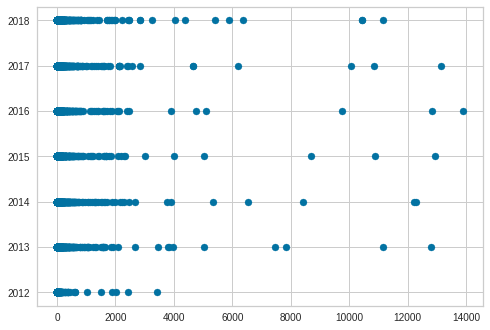

In [ ]:
#model
#Hierarchal clustering
x= list(export_data.value)
y = list(export_data.year)
plt.scatter(x, y)
data = list(zip(x, y))
print(data)
data_scaled = normalize(data)
print(data_scaled)
# plt.show()
# plt.savefig("hierarchal_scatter_plot1.png")
# files.download("hierarchal_scatter_plot1.png")

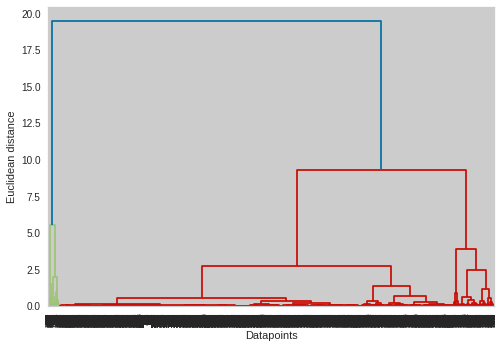

In [ ]:
# data = list(zip(x, y))
# data_scaled = normalize(data)
linkage_data = linkage(data_scaled, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()
# plt.savefig("dendogram1.png")
# files.download("dendogram1.png")


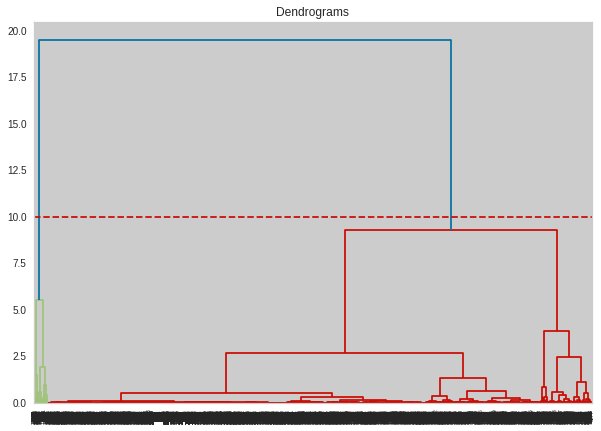

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=10, color='r', linestyle='--')
# plt.savefig("dendogram1_with_line.png")
# files.download("dendogram1_with_line.png")

In [ ]:
#--------------------Davies Bouldin score for hierarchical models-------------------------
from sklearn.metrics import davies_bouldin_score
def get_Hmeans_score(
    data, distance, link, center
):  #--------------------- We can specify linkage and distance
    """
    returns the  score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit Agglomerative to
        distance - the distance for AgglomerativeClustering
        link - the linkage method for AgglomerativeClustering
        center - the number of clusters you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the Hierarchical model fit to the data
    """
    #---------------instantiate Hierarchical Clustering

    hmeans = AgglomerativeClustering(n_clusters=center, affinity=distance, linkage=link)

    #---------------Then fit the model to the data using the fit method
    model = hmeans.fit_predict(data)
#---------------Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    return score

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

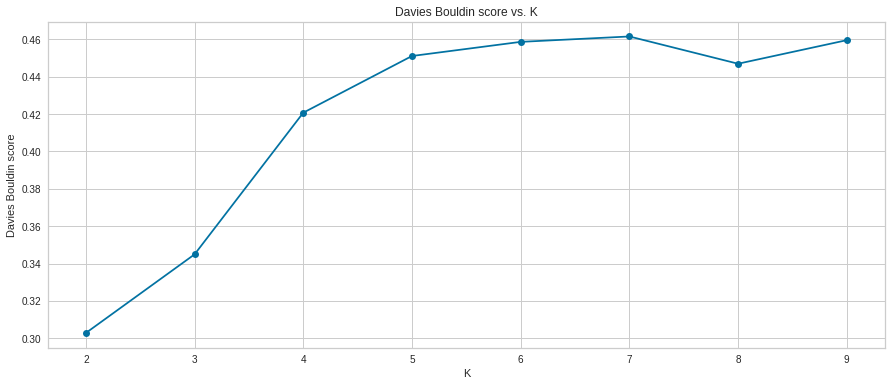

In [ ]:
centers = list(range(2, 10)) #------Number of Clusters in the data
avg_scores = []
for center in centers:
 avg_scores.append(get_Hmeans_score(data_scaled, "euclidean", "average", center))
plt.figure(figsize=(15,6));

plt.plot(centers, avg_scores, linestyle= '-', marker="o", color="b")
plt.xlabel("K")
plt.ylabel("Davies Bouldin score")
plt.title("Davies Bouldin score vs. K")
plt.savefig("Davies Bouldin_hierarchical1.png")
files.download("Davies Bouldin_hierarchical1.png")

silhouette score : 0.9190125716345704
Calinski-Harabasz Index : 27332.688557092108
davies_bouldin_score : 0.3271241784629912
[0 1 0 ... 0 0 0]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

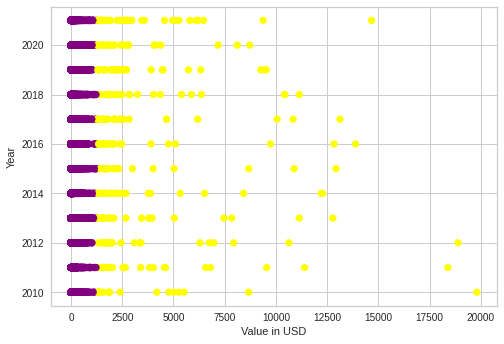

In [ ]:
#AgglomerativeClustering
#number of clusters=2 as davies_bouldin_score is lowest for k=2
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data_scaled)
score = silhouette_score(data_scaled,labels)
score2 = calinski_harabasz_score(data_scaled,labels)
score3 = davies_bouldin_score(data_scaled,labels)
print("silhouette score :",score)
print("Calinski-Harabasz Index :",score2)
print("davies_bouldin_score :",score3)
colors = ['purple','yellow']
plt.scatter(x, y, c=labels,cmap= matplotlib.colors.ListedColormap(colors))
print(labels)
plt.xlabel('Value in USD')
plt.ylabel('Year')
# plt.show()
plt.savefig("agglomerative1.png")
files.download("agglomerative1.png")

Text(0, 0.5, 'Euclidean distance')

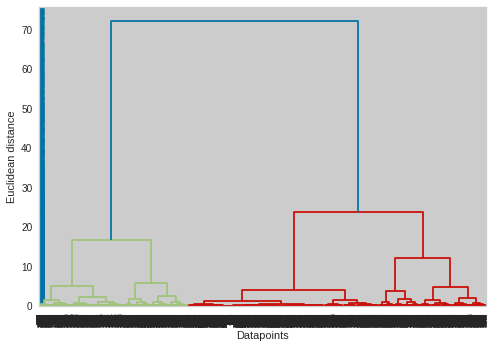

In [ ]:
#Hscode and value
x= list(export_data.HSCode)
y = list(export_data.value)
plt.scatter(x, y)
# plt.show()
# plt.savefig("hierarchal_scatter_plot2.png")
# files.download("hierarchal_scatter_plot2.png")
data = list(zip(x, y))
data_scaled = normalize(data)
linkage_data = linkage(data_scaled, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
# plt.show()
# plt.savefig("Dendogram2.png")
# files.download("Dendogram2.png")

In [ ]:
#--------------------Davies Bouldin score for hierarchical models-------------------------
from sklearn.metrics import davies_bouldin_score
def get_Hmeans_score(
    data, distance, link, center
):  #--------------------- We can specify linkage and distance
    """
    returns the  score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit Agglomerative to
        distance - the distance for AgglomerativeClustering
        link - the linkage method for AgglomerativeClustering
        center - the number of clusters you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the Hierarchical model fit to the data
    """
    #---------------instantiate Hierarchical Clustering

    hmeans = AgglomerativeClustering(n_clusters=center, affinity=distance, linkage=link)

    #---------------Then fit the model to the data using the fit method
    model = hmeans.fit_predict(data)
#---------------Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    return score

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

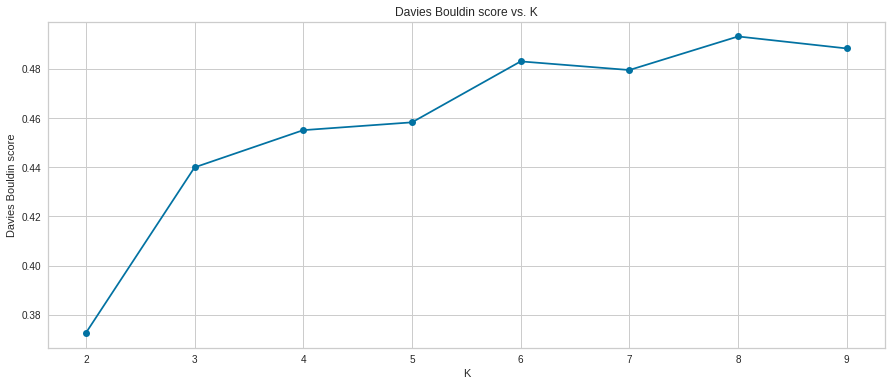

In [ ]:
centers = list(range(2, 10)) #------Number of Clusters in the data
avg_scores = []
for center in centers:
 avg_scores.append(get_Hmeans_score(data_scaled, "euclidean", "average", center))
plt.figure(figsize=(15,6));

plt.plot(centers, avg_scores, linestyle= '-', marker="o", color="b")
plt.xlabel("K")
plt.ylabel("Davies Bouldin score")
plt.title("Davies Bouldin score vs. K")
plt.savefig("Davies Bouldin hierarchical2.png")
files.download("Davies Bouldin hierarchical2.png")

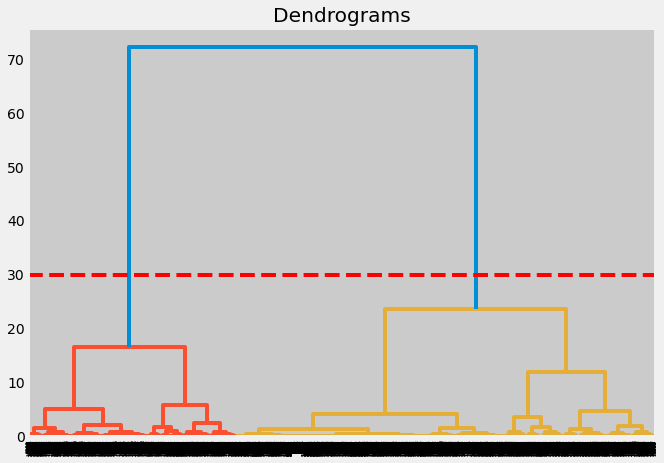

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=30, color='r', linestyle='--')
# plt.savefig("Dendogram_with_line2.png")
# files.download("Dendogram_with_line2.png")

silhouette score : 0.21600359179995487
Calinski-Harabasz Index : 103.54816206469184
davies_bouldin_score : 0.5214236929003101


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

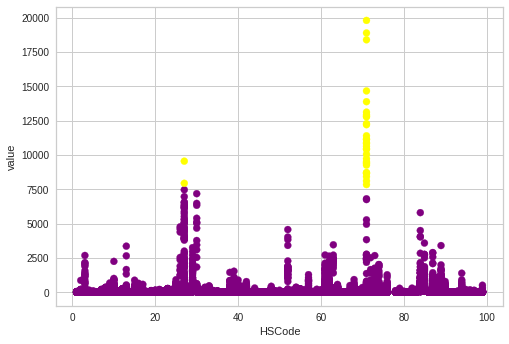

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)
score = silhouette_score(data_scaled,labels)
score2 = calinski_harabasz_score(data_scaled,labels)
score3 = davies_bouldin_score(data_scaled,labels)
print("silhouette score :",score)
print("Calinski-Harabasz Index :",score2)
print("davies_bouldin_score :",score3)
colors = ['purple','yellow']
plt.scatter(x, y, c=labels,cmap= matplotlib.colors.ListedColormap(colors))
plt.xlabel('HSCode')
plt.ylabel('value')
# plt.show()
plt.savefig("agglomerative2.png")
files.download("agglomerative2.png")

Text(0, 0.5, 'Euclidean distance')

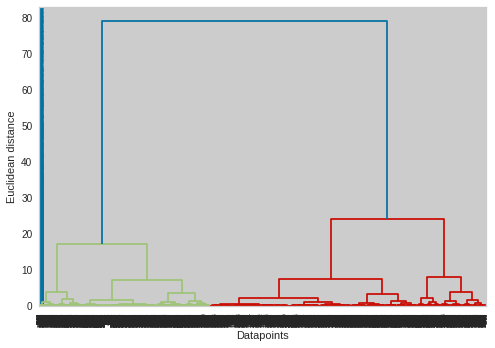

In [ ]:
#Hscode and value
x= list(export_data.Ccode)
y = list(export_data.value)
plt.scatter(x, y)
# plt.show()
# plt.savefig("hierarchal_scatter_plot3.png")
# files.download("hierarchal_scatter_plot3.png")
data = list(zip(x, y))
data_scaled = normalize(data)
linkage_data = linkage(data_scaled, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
# plt.show()
# plt.savefig("Dendogram3.png")
# files.download("Dendogram3.png")

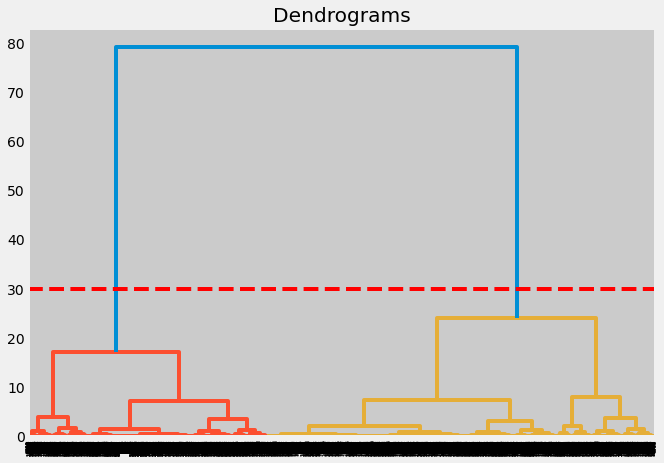

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=30, color='r', linestyle='--')
# plt.savefig("Dendogram_with_line3.png")
# files.download("Dendogram_with_line3.png")

In [ ]:
#--------------------Davies Bouldin score for hierarchical models-------------------------
from sklearn.metrics import davies_bouldin_score
def get_Hmeans_score(
    data, distance, link, center
):  #--------------------- We can specify linkage and distance
    """
    returns the  score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit Agglomerative to
        distance - the distance for AgglomerativeClustering
        link - the linkage method for AgglomerativeClustering
        center - the number of clusters you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the Hierarchical model fit to the data
    """
    #---------------instantiate Hierarchical Clustering

    hmeans = AgglomerativeClustering(n_clusters=center, affinity=distance, linkage=link)

    #---------------Then fit the model to the data using the fit method
    model = hmeans.fit_predict(data)
#---------------Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    return score

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

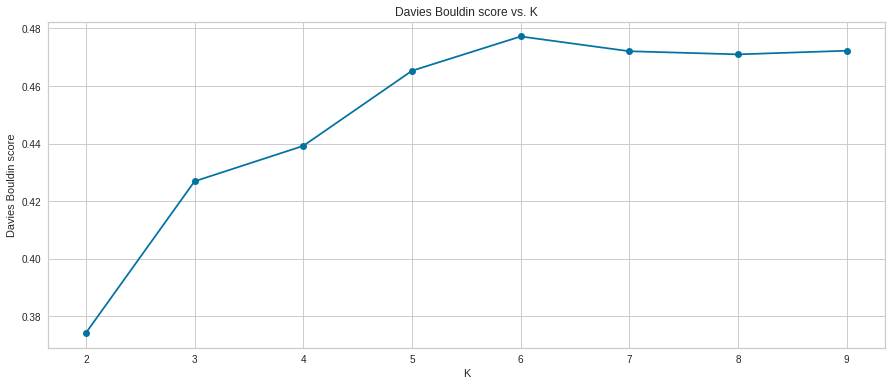

In [ ]:
centers = list(range(2, 10)) #------Number of Clusters in the data
avg_scores = []
for center in centers:
 avg_scores.append(get_Hmeans_score(data_scaled, "euclidean", "average", center))
plt.figure(figsize=(15,6));

plt.plot(centers, avg_scores, linestyle= '-', marker="o", color="b")
plt.xlabel("K")
plt.ylabel("Davies Bouldin score")
plt.title("Davies Bouldin score vs. K")
plt.savefig("Davies Bouldin hierarchial3.png")
files.download("Davies Bouldin hierarchial3.png")

silhouette score : -0.24274472431122845
Calinski-Harabasz Index : 35.497968324273984
davies_bouldin_score : 0.9097956943569544


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

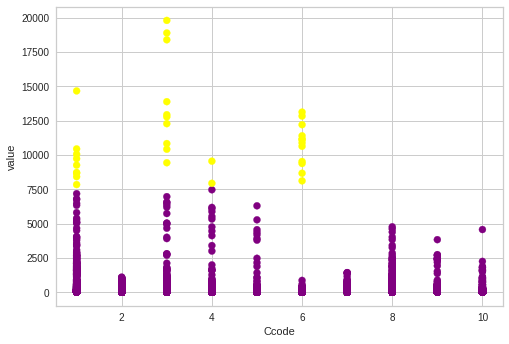

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)
score = silhouette_score(data_scaled,labels)
score2 = calinski_harabasz_score(data_scaled,labels)
score3 = davies_bouldin_score(data_scaled,labels)
print("silhouette score :",score)
print("Calinski-Harabasz Index :",score2)
print("davies_bouldin_score :",score3)
colors = ['purple','yellow']
plt.scatter(x, y, c=labels,cmap= matplotlib.colors.ListedColormap(colors))
plt.xlabel('Ccode')
plt.ylabel('value')
# plt.show()
plt.savefig("agglomerative3.png")
files.download("agglomerative3.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

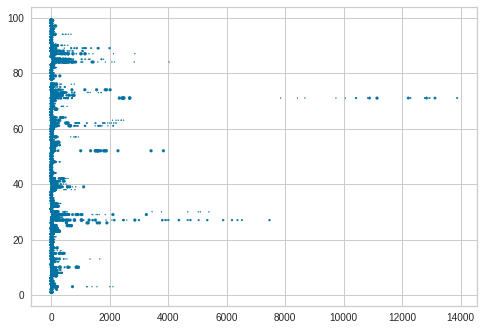

In [ ]:
#Kmeans
x= list(export_data.value)
y = list(export_data.HSCode)
z=list(export_data.Ccode)
# Hscode.dropna(inplace=True)
plt.scatter(x, y,z)
# plt.show()
plt.savefig("kmeans_scatter1.png")
files.download("kmeans_scatter1.png")

In [ ]:

pca = PCA(2)
data = np.array(list(zip(x, y,z)))
print(data)
data = pca.fit_transform(data)
print(data)
# # standardizing the data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data = scaler.fit_transform(data)

# print(data)

[[1.8000e-01 1.0000e+00 1.0000e+00]
 [7.8000e-01 2.0000e+00 1.0000e+00]
 [2.0003e+03 3.0000e+00 1.0000e+00]
 ...
 [9.4000e-01 9.7000e+01 1.0000e+01]
 [2.9000e-01 9.8000e+01 1.0000e+01]
 [9.4000e-01 9.9000e+01 1.0000e+01]]
[[-151.33230756   48.84264601]
 [-150.73081915   47.84354078]
 [1848.7882713    49.82033359]
 ...
 [-150.43318817  -47.16415717]
 [-151.08169825  -48.16512335]
 [-150.4302099   -49.16415415]]
6008


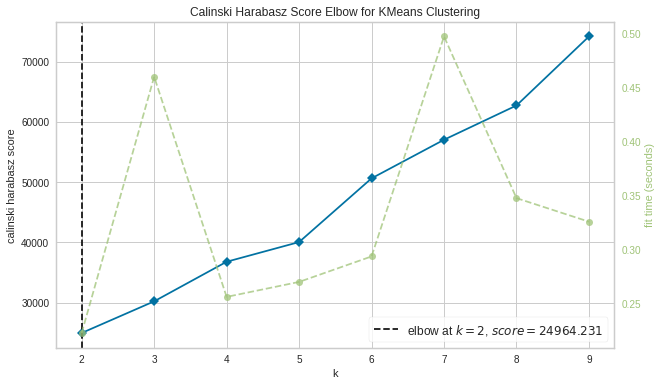

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 576x396 with 0 Axes>

In [ ]:
#---------------------- Calinski Harabasz Score for K means
#A higher score indicates better cluster compactness.
plt.figure(figsize=(10,6))
model = KMeans(random_state=1)
# k is a range of the number of clusters.
visualizer = KElbowVisualizer(
    model, k=(2, 10), metric="calinski_harabasz", timings=True
)
visualizer.fit(data)  # Fit the data to the visualizer
visualizer.show()  # Finalize and generate the plot
plt.savefig("kmeans1Calinski.png")
files.download("kmeans1Calinski.png")

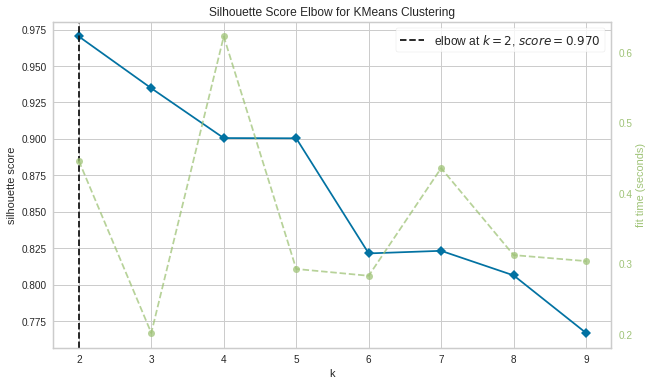

In [ ]:
plt.figure(figsize=(10,6))
model = KMeans(random_state=1)
# k is a range of the number of clusters.
visualizer = KElbowVisualizer(
    model, k=(2, 10), metric="silhouette", timings=True
)
visualizer.fit(data)  # Fit the data to the visualizer
visualizer.show()  # Finalize and generate the plot
plt.savefig("kmeans1Silhoutte.png")
files.download("kmeans1Silhoutte.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

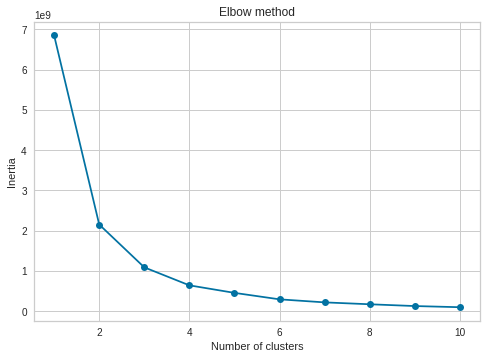

In [ ]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
# plt.show()
plt.savefig("elbow_method1.png")
files.download("elbow_method1.png")

In [ ]:
#training the K-means model on a dataset

kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(data)

np.set_printoptions(threshold=sys.maxsize)
print(y_predict)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

0.9701213617087739


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

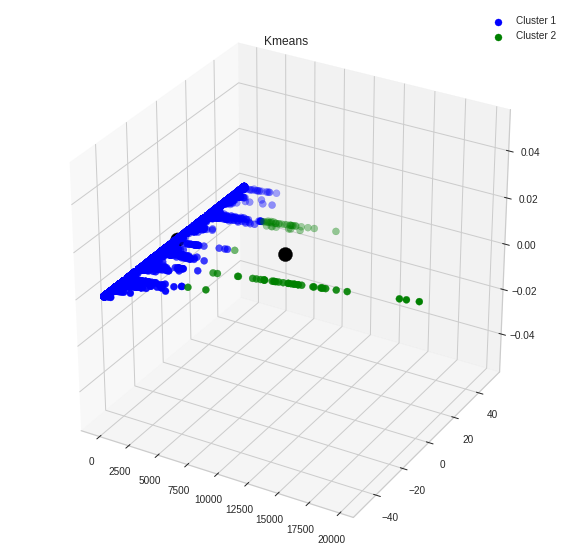

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
# Data for three-dimensional scattered points
ax.scatter3D(data[y_predict == 0, 0], data[y_predict == 0, 1], s = 50, c='blue', label = 'Cluster 1')
ax.scatter3D(data[y_predict == 1, 0], data[y_predict == 1, 1], s = 50,c ='green', label = 'Cluster 2')
# ax.scatter3D(data[y_predict== 2, 0], data[y_predict == 2, 1], s = 50,c ='red', label = 'Cluster 3')
# ax.scatter3D(data[y_predict == 3, 0], data[y_predict == 3, 1], s = 50,c ='orange', label = 'Cluster 4')
# ax.scatter3D(data[y_predict == 4, 0], data[y_predict == 4, 1], s = 50,c ='purple', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1] ,color = 'black', s = 200,alpha=1)
plt.legend()
plt.title("Kmeans")
# plt.show()
from sklearn.metrics import silhouette_score
score = silhouette_score(data,y_predict)
print(score)
plt.savefig("kmeans_3d.png")
files.download("kmeans_3d.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.9701213617087739


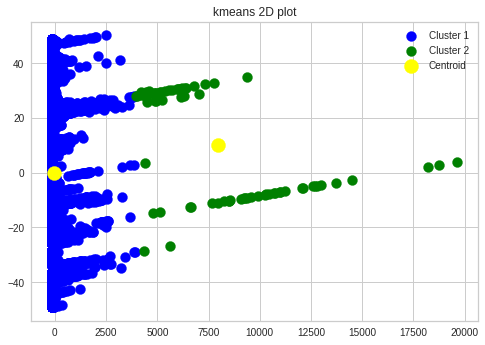

In [ ]:
#visualising above using 2D plot
plt.scatter(data[y_predict == 0, 0], data[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
plt.scatter(data[y_predict == 1, 0], data[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
# plt.scatter(data[y_predict== 2, 0], data[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster
# plt.scatter(data[y_predict == 3, 0], data[y_predict == 3, 1], s = 100, c = 'orange', label = 'Cluster 4') #for fourth cluster
# plt.scatter(data[y_predict == 4, 0], data[y_predict == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5') #for fifth cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroid')
plt.title('kmeans 2D plot')
plt.legend()
# plt.show()
plt.savefig("kmeans_3d_in2d.png")
files.download("kmeans_3d_in2d.png")

from sklearn.metrics import silhouette_score
score = silhouette_score(data,y_predict)
print(score)

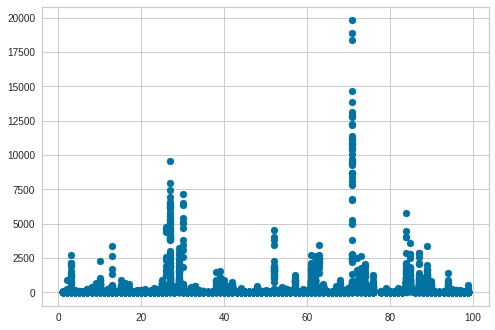

Streaming output truncated to the last 5000 lines.
 [7.300000e+01 6.248000e+01]
 [7.400000e+01 1.144100e+03]
 [7.500000e+01 3.548000e+01]
 [7.600000e+01 5.290000e+00]
 [7.800000e+01 3.000000e-01]
 [7.900000e+01 2.006000e+01]
 [8.000000e+01 0.000000e+00]
 [8.100000e+01 6.200000e-01]
 [8.200000e+01 7.360000e+00]
 [8.300000e+01 8.020000e+00]
 [8.400000e+01 4.619900e+02]
 [8.500000e+01 2.850200e+02]
 [8.600000e+01 1.720000e+00]
 [8.700000e+01 7.534000e+01]
 [8.800000e+01 1.740000e+01]
 [9.000000e+01 1.343400e+02]
 [9.100000e+01 3.700000e-01]
 [9.200000e+01 6.300000e-01]
 [9.300000e+01 0.000000e+00]
 [9.400000e+01 2.119000e+01]
 [9.500000e+01 5.660000e+00]
 [9.600000e+01 5.140000e+00]
 [9.700000e+01 2.300000e-01]
 [9.800000e+01 1.960000e+00]
 [9.900000e+01 6.470000e+00]
 [1.000000e+00 0.000000e+00]
 [3.000000e+00 1.492600e+02]
 [5.000000e+00 6.440000e+00]
 [6.000000e+00 7.500000e-01]
 [7.000000e+00 1.793000e+01]
 [8.000000e+00 2.573000e+01]
 [9.000000e+00 4.867000e+01]
 [1.000000e+01 3.8430

In [ ]:
#kmeans
#2d plot
x= list(export_data.HSCode)
y = list(export_data.value)
plt.scatter(x, y)
plt.show()
# plt.savefig("kmeans_scatter2.png")
# files.download("kmeans_scatter2.png")
data = np.array(list(zip(x, y)))
print(len(data))
print(data)
# # standardizing the data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data = scaler.fit_transform(data)

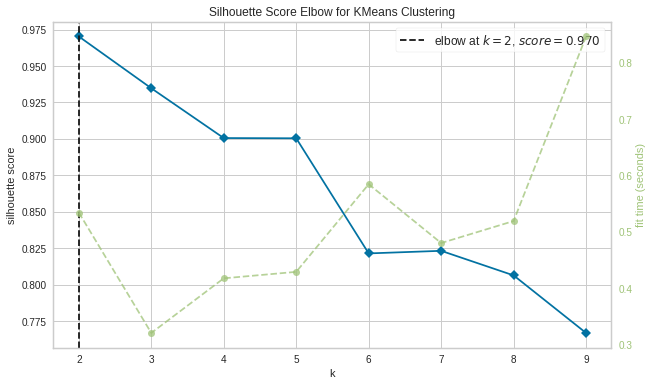

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 576x396 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))
model = KMeans(random_state=1)
# k is a range of the number of clusters.
visualizer = KElbowVisualizer(
    model, k=(2, 10), metric="silhouette", timings=True
)
visualizer.fit(data)  # Fit the data to the visualizer
visualizer.show()  # Finalize and generate the plot
plt.savefig("kmeans_Silhoutte3.png")
files.download("kmeans_Silhoutte3.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

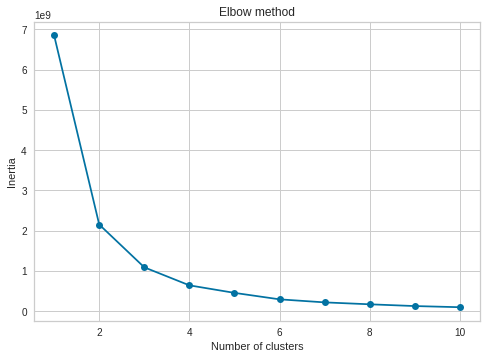

In [ ]:

#elbow methos
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
# plt.show()
plt.savefig("elbow_method2.png")
files.download("elbow_method2.png")
# print(data)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.9701213884827219


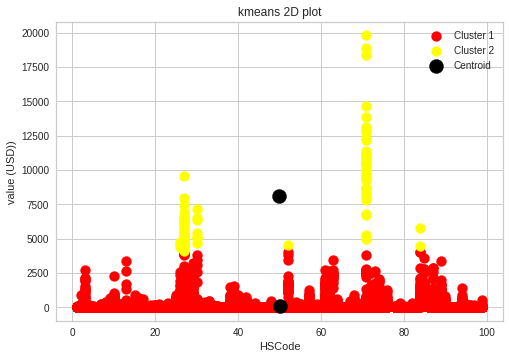

In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(data)
np.set_printoptions(threshold=sys.maxsize)
print(y_predict)

#visulaizing the clusters

plt.scatter(data[y_predict == 0, 0], data[y_predict == 0, 1], s = 100, c = 'red', label = 'Cluster 1') #for first cluster
plt.scatter(data[y_predict == 1, 0], data[y_predict == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2') #for second cluster
# plt.scatter(data[y_predict== 2, 0], data[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster
# plt.scatter(data[y_predict == 3, 0], data[y_predict == 3, 1], s = 100, c = 'orange', label = 'Cluster 4') #for fourth cluster
# plt.scatter(data[y_predict == 4, 0], data[y_predict == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5') #for fifth cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroid')
plt.title('kmeans 2D plot')
plt.xlabel('HSCode')
plt.ylabel('value (USD))')
plt.legend()
# plt.show()
plt.savefig("kmeans2d.png")
files.download("kmeans2d.png")
from sklearn.metrics import silhouette_score
score = silhouette_score(data,y_predict)
print(score)

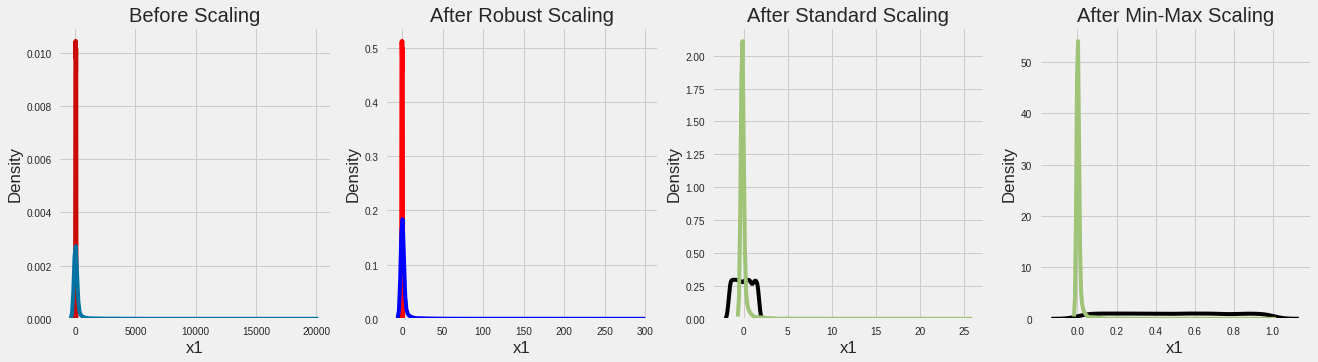

In [ ]:
#checking scaling data using different methods
# knn
#Fitting K-NN classifier to the training set

matplotlib.style.use('fivethirtyeight')

x = pd.DataFrame({'x1':  list(export_data.HSCode),'x2': list(export_data.value )
})

	# Distribution with lower outliers


	# Distribution with higher outliers

np.random.normal

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()


In [ ]:
                                        #knn
from sklearn.feature_selection import chi2, SelectKBest, f_classif
print(export_data.columns.values)
export_data = export_data[['HSCode', 'value',  'year' , 'country','Commodity','Ccode' ]]
x= export_data.iloc[:, [0,1]].values
y= export_data.iloc[:, 5].values

#TESTING
print(x.shape)
print(y.shape)

X_train, X_test, y_train, y_test =train_test_split(x, y, test_size=0.1, random_state=1,stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)
# Get the two best(k = 2) features using the SelectKBest method
ft = SelectKBest(chi2, k = 2).fit(X_train, y_train)
print('Score: ', ft.scores_)

ft = SelectKBest(f_classif, k= 2).fit(X_train, y_train)
print('Score: ', ft.scores_)


['HSCode' 'Commodity' 'value' 'country' 'year' 'Ccode']
(11455, 2)
(11455,)
Score:  [5.08229070e+01 8.55414048e+05]
Score:  [ 0.34714096 26.77431198]


In [ ]:
def score(y_pred, y_true):
  error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
  score = 1 - error
  return score
y_actual = y_test


from sklearn.linear_model import Lasso
#Initializing the Lasso Regressor with Normalization Factor as True
lasso_reg = Lasso(normalize=True)
#Fitting the Training data to the Lasso regressor
lasso_reg.fit(X_train,y_train)
#Predicting for X_test
y_pred_lass =lasso_reg.predict(X_test)
#Printing the Score with RMLSE
print("\n\nLasso SCORE : ", score(y_pred_lass, y_actual))




Lasso SCORE :  0.7642308250066526


In [ ]:
X_train_2 = ft.transform(X_train)
X_val_2 = ft.transform(X_val)
X_test_2 = ft.transform(X_test)
X_train = preprocessing.StandardScaler().fit(X_train_2).transform(X_train_2.astype(float))
X_val = preprocessing.StandardScaler().fit(X_val_2).transform(X_val_2.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test_2).transform(X_test_2.astype(float))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [ ]:
from sklearn import metrics
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.21029668, 0.19808028, 0.21465969, 0.20855148, 0.21029668,
       0.20331588, 0.21029668, 0.21378709, 0.20506108, 0.20331588,
       0.20593368, 0.20506108, 0.20680628, 0.21029668, 0.20767888,
       0.19982548, 0.19371728, 0.19982548, 0.19284468, 0.19109948])

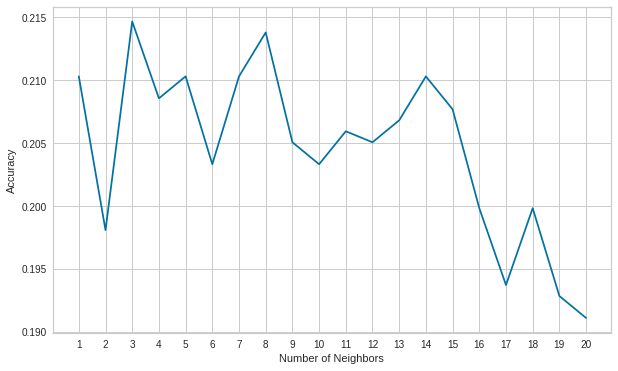

In [ ]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()
# plt.savefig("knn_neighbours_graph.png")
# files.download("knn_neighbours_graph.png")

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [3],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)
g_res.best_score_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


0.38176374980185196

In [ ]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

In [ ]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform',algorithm = 'brute',metric = 'manhattan')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=3)

In [ ]:
# get a prediction
from sklearn.metrics import mean_squared_error
from math import sqrt
y_hat = knn.predict(X_train)
mse1 = mean_squared_error(y_train, y_hat)
rmse1 = sqrt(mse1)
y_valid=knn.predict(X_val)
mse2 = mean_squared_error(y_val, y_valid)
rmse2 = sqrt(mse2)
y_knn = knn.predict(X_test)
mse3 = mean_squared_error(y_test, y_knn)
rmse3 = sqrt(mse3)
print(rmse1)
print(rmse2)
print(rmse3)


2.66201676581474
3.9496098593072646
3.5110148292039516


In [ ]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('validate set accuracy: ',metrics.accuracy_score(y_val, y_valid))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.620392325932313
validate set accuracy:  0.16488845780795344
Test set accuracy:  0.22076788830715532


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, x, y, cv =5)
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.31348756001745964


In [ ]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v','8','p','P','>','<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan','pink','orange','yellow','indigo','green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    print(np.unique(y))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


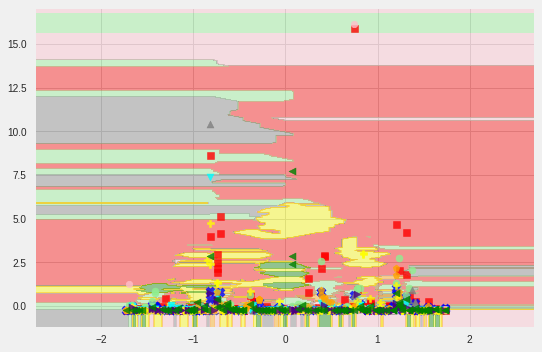

In [ ]:
plot_decision_regions(X_test, y_test, knn)
# plt.savefig("knn_plot.png")
# files.download("knn_plot.png")

              precision    recall  f1-score   support

         1.0       0.46      0.47      0.47       117
         2.0       0.27      0.16      0.20       116
         3.0       0.29      0.19      0.23       118
         4.0       0.15      0.20      0.17       115
         5.0       0.26      0.20      0.23       114
         6.0       0.16      0.37      0.23       110
         7.0       0.25      0.12      0.16       116
         8.0       0.24      0.15      0.19       113
         9.0       0.14      0.19      0.16       111
        10.0       0.17      0.16      0.16       116

    accuracy                           0.22      1146
   macro avg       0.24      0.22      0.22      1146
weighted avg       0.24      0.22      0.22      1146



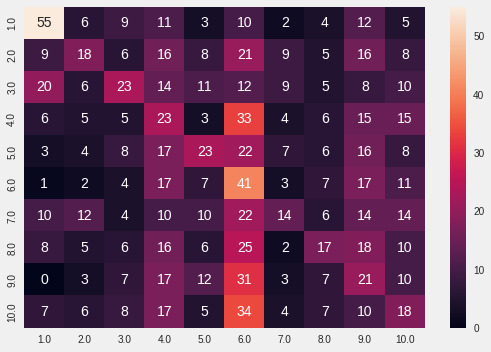

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap
import seaborn as sns

# Adding classes names for better interpretation
classes_names = export_data.Ccode.unique().tolist()
cm = pd.DataFrame(confusion_matrix(y_test, y_knn),
                  columns=classes_names, index = classes_names)

# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_knn))

Test set score: 0.2208
[[0.         0.         0.         ... 0.         0.33333333 0.        ]
 [0.         0.         0.         ... 0.         0.66666667 0.        ]
 [0.         0.         0.         ... 0.         0.         0.33333333]
 ...
 [0.66666667 0.         0.         ... 0.33333333 0.         0.        ]
 [0.         0.         0.33333333 ... 0.         0.33333333 0.        ]
 [0.         0.         0.         ... 0.         0.66666667 0.        ]]
auc score 0.5226674308306961


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

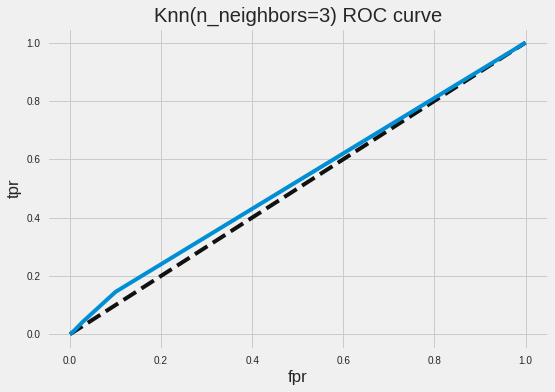

In [ ]:
# multi-class classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score , auc
from sklearn import preprocessing


# fit model
# knn.predict_proba(X_test)

print("Test set score: {:.4f}".format(knn.score(X_test, y_test)))

# knn_cv = KNeighborsClassifier(n_neighbors=3)
# cv_scores = cross_val_score(knn_cv, x, y, cv=3)
# print(cv_scores)
# print('cv_scores mean:{}' .format(np.mean(cv_scores)))

y_scores = knn.predict_proba(X_test)
print(y_scores)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1] ,pos_label=1)
# y_scores = cross_val_score(knn_cv, x, y, cv=76)
# fpr, tpr, threshold = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print("auc score",roc_auc)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=3) ROC curve')
# plt.show()
plt.savefig("roc.png")
files.download("roc.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

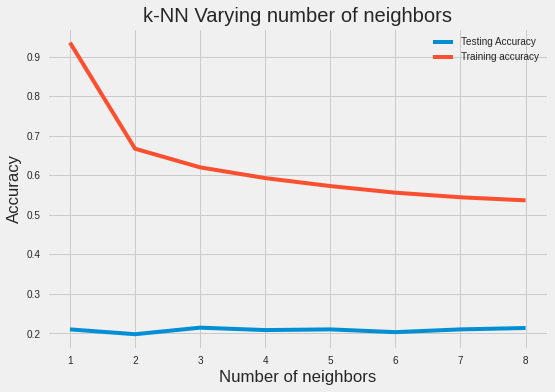

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    knn.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
 plt.show()
# plt.savefig("testing_training_accuracy_knn.png")
# files.download("testing_training_accuracy_knn.png")

In [ ]:
export_data.describe()


,HSCode,value,year,Ccode
count,11455.00,11455.00,11455.00,11455.00
mean,50.05,159.28,2015.49,5.47
std,28.45,772.67,3.45,2.88
min,1.00,0.00,2010.00,1.00
25%,25.00,1.35,2012.00,3.00
50%,50.00,11.94,2015.00,5.00
75%,74.00,68.49,2018.00,8.00
max,99.00,19805.17,2021.00,10.00


In [ ]:
def score(y_pred, y_true):
  error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
  score = 1 - error
  return score
actual_cost = list(X_train['Ccode'])
actual_cost = np.asarray(actual_cost)


IndexError: ignored

In [ ]:
#Lasso Regression


from sklearn.linear_model import Lasso
#Initializing the Lasso Regressor with Normalization Factor as True
lasso_reg = Lasso(normalize=True)
#Fitting the Training data to the Lasso regressor
lasso_reg.fit(X_train,y_train)
#Predicting for X_test
y_pred_lass =lasso_reg.predict(X_test)
#Printing the Score with RMLSE
print("\n\nLasso SCORE : ", score(y_pred_lass, actual_cost))

NameError: ignored